In [1]:
# 1. Installation
# (Ceci installe YOLOv8 dans votre environnement Colab)
!pip install ultralytics

# 2. Importer les bibliothèques
from ultralytics import YOLO
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### ÉTAPE 1 : CHARGEMENT DU MODÈLE

Nous allons charger un modèle YOLOv8 pré-entraîné. C'est un bon point de départ car il a déjà appris à détecter de nombreux objets courants. Vous pouvez choisir différentes tailles de modèles (comme `yolov8s.pt` pour un modèle plus petit et rapide, ou `yolov8m.pt` pour un modèle plus grand et plus précis).

In [2]:
# Charger un modèle pré-entraîné YOLOv8n (nano).
# 'yolov8n.pt' charge un modèle avec des poids pré-entraînés.
# Pour entraîner depuis zéro, on utiliserait 'yolov8n.yaml'.
model = YOLO('yolov8n.pt')

### ÉTAPE 2 : ENTRAÎNEMENT DU MODÈLE

C'est l'étape où le modèle apprend à détecter les objets spécifiques de votre dataset. Nous utilisons le dataset `coco128.yaml` pour cet exemple, mais **vous devrez le remplacer par le chemin de votre propre fichier `.yaml` de dataset** lorsque vous voudrez entraîner avec vos données.

*   `data`: Le chemin vers votre fichier de configuration de dataset (.yaml).
*   `epochs`: Le nombre de fois que le modèle parcourt l'ensemble de votre dataset. 50 est un bon début.
*   `imgsz`: La taille à laquelle les images sont redimensionnées pour l'entraînement (640x640 est standard pour YOLOv8).
*   `batch`: Le nombre d'images traitées simultanément. Ajustez-le si vous manquez de mémoire GPU.
*   `name`: Le nom du dossier où les résultats de l'entraînement seront sauvegardés.

In [3]:
# Entraîner le modèle.
results = model.train(
    data='coco128.yaml',  # REMPLACEZ CECI par le .yaml de VOTRE dataset (e.g., 'path/to/your_dataset.yaml')
    epochs=50,                  # Nombre de fois que le modèle 'regarde' le dataset.
    imgsz=640,                  # Taille des images.
    batch=16,                   # Nombre d'images à traiter en même temps.
    name='mon_premier_modele_EPI' # Nom du dossier pour les résultats
)

print("L'entraînement est terminé. Le meilleur modèle est sauvegardé dans 'runs/detect/mon_premier_modele_EPI/weights/best.pt'")

Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco128.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=mon_premier_modele_EPI, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=

### ÉTAPE 3 : VALIDATION DU MODÈLE

Après l'entraînement, il est crucial d'évaluer les performances de votre modèle. Cette étape utilise le jeu de données de validation (défini dans votre fichier `.yaml`) pour calculer des métriques comme la Précision Moyenne (mAP). Cela vous donne une idée de la généralisation de votre modèle à des données invisibles.

In [4]:
# Charger le modèle que vous venez d'entraîner.
model_entraine = YOLO('runs/detect/mon_premier_modele_EPI/weights/best.pt')

# Valider le modèle sur le jeu de données de validation.
metrics = model_entraine.val()

print("Résultats de la validation :")
print(f"Précision mAP50-95 : {metrics.box.map}")    # Score de précision principal (mAP sur différentes seuils d'IoU)
print(f"Précision mAP50 : {metrics.box.map50}")     # mAP à un seuil d'IoU de 0.5 (souvent utilisé pour les démos)

Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1965.1±425.7 MB/s, size: 53.4 KB)
val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 128/128 293.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 2.8it/s 2.9s
                   all        128        929      0.856      0.777       0.85      0.673
                person         61        254      0.972      0.685      0.853      0.658
               bicycle          3          6      0.882        0.5      0.612      0.473
                   car         12         46      0.928      0.282      0.548      0.304
            motorcycle          4          5      0.932          1      0.995      0.876
              airplane          5    

### ÉTAPE 4 : PRÉDICTION / INFÉRENCE

Enfin, vous pouvez utiliser votre modèle entraîné pour faire des prédictions sur de nouvelles images ou vidéos. C'est l'application pratique de votre modèle.

*   Remplacez `'https://ultralytics.com/images/bus.jpg'` par le chemin d'une image locale ou une URL d'image que vous souhaitez tester.
*   Le paramètre `save=True` enregistrera les images avec les détections (boîtes englobantes et étiquettes) dans le dossier `runs/detect/predict/`.

In [5]:
# Utiliser votre modèle pour prédire sur une image exemple.
# Remplacez l'URL par une image de votre choix.
results = model_entraine.predict('https://ultralytics.com/images/bus.jpg', save=True)

print("Prédiction terminée. L'image avec les détections est sauvegardée dans 'runs/detect/predict/'")


WARNING ⚠️ Download failure, retrying 1/3 https://ultralytics.com/images/bus.jpg... HTTP Error 403: Forbidden
image 1/1 /content/bus.jpg: 640x480 3 persons, 1 bus, 43.5ms
Speed: 2.1ms preprocess, 43.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/runs/detect/predict
Prédiction terminée. L'image avec les détections est sauvegardée dans 'runs/detect/predict/'


In [6]:
!ls runs/detect/predict/

bus.jpg


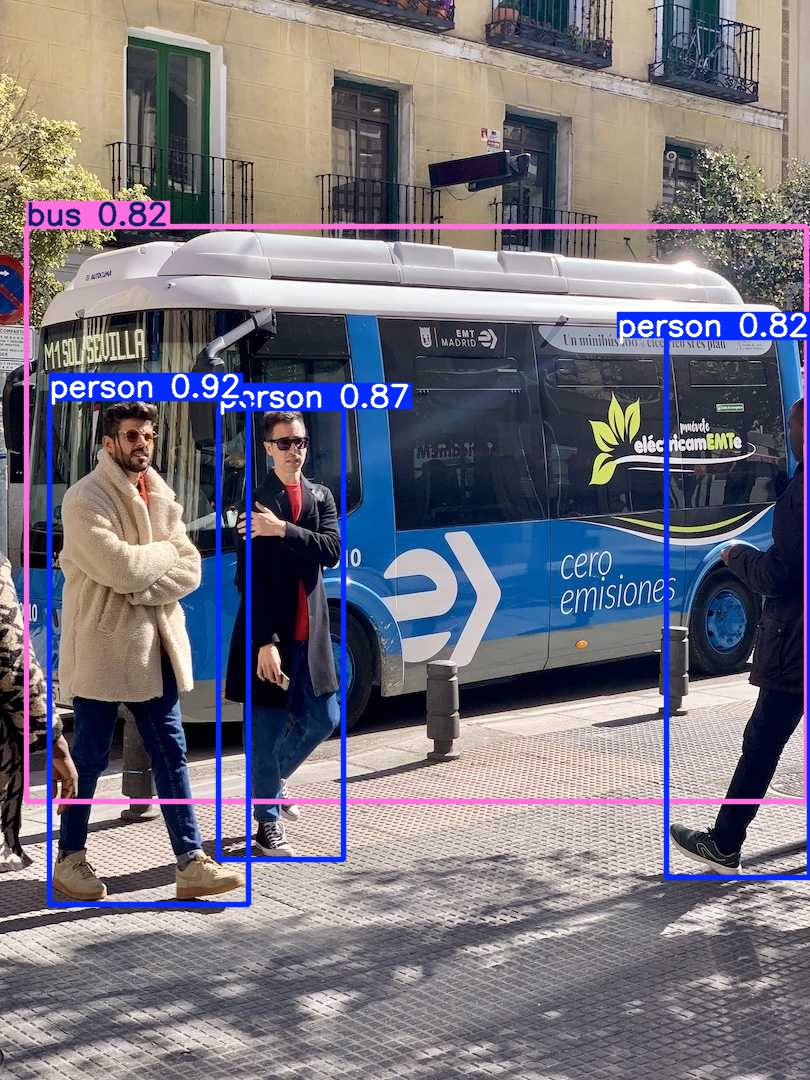

Image affichée : bus.jpg


In [7]:
from PIL import Image
from IPython.display import display
import os

# Chemin vers le dossier où les images prédites sont sauvegardées
predict_dir = 'runs/detect/predict/'

# Lister tous les fichiers dans le répertoire de prédiction
# et prendre le premier fichier image trouvé (ou le plus récent si vous avez plusieurs prédictions)
# Pour cet exemple, nous supposons qu'il n'y a qu'une seule image prédite à la fois.
image_files = [f for f in os.listdir(predict_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

if image_files:
    # Prenez le premier fichier image trouvé (vous pouvez ajouter une logique pour le plus récent si besoin)
    image_filename = image_files[0]
    image_path = os.path.join(predict_dir, image_filename)

    # Ouvrir et afficher l'image
    img = Image.open(image_path)
    display(img)
    print(f"Image affichée : {image_filename}")
else:
    print(f"Aucune image trouvée dans le dossier {predict_dir}. Veuillez vérifier que la prédiction a bien eu lieu.")